In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv('data.csv')
df.shape
pd.set_option('display.max_rows', 500)

### First look at data

In [3]:
df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
 Realized Sales Gross Margin                                float64
 Operating Profit Rate                                      float64
 Pre-tax net Interest Rate                                  float64
 After-tax net Interest Rate                                float64
 Non-industry income and expenditure/revenue                float64
 Continuous interest rate (after tax)                       float64
 Operating Expense Rate                                     float64
 Research and development expense rate                      float64
 Cash flow rate                                             float64
 Interest-bearing debt interest rate            

In [4]:
df.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

In [5]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
# Stripping any whitespaces before and after the column names.
df = df.rename(columns=lambda x: x.strip())
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [7]:
df.drop(['Net Income Flag','Liability-Assets Flag'], axis=1, inplace=True)

### Looking for high correlation

In [4]:
# Find the Column Collinearity
# # Create correlation matrix
corr_matrix = df.corr().abs()
# # Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# # Find features with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print(to_drop)
print(len(to_drop))
# # Drop features
df.drop(to_drop, axis=1, inplace=True)

['ROA(A) before interest and % after tax', 'ROA(B) before interest and depreciation after tax', 'Realized Sales Gross Margin', 'Pre-tax net Interest Rate', 'After-tax net Interest Rate', 'Continuous interest rate (after tax)', 'Net Value Per Share (A)', 'Net Value Per Share (C)', 'Operating Profit Per Share (Yuan ¥)', 'Per Share Net profit before tax (Yuan ¥)', 'Regular Net Profit Growth Rate', 'Net worth/Assets', 'Operating profit/Paid-in capital', 'Net profit before tax/Paid-in capital', 'Operating Funds to Liability', 'Current Liabilities/Equity', 'Cash Flow to Sales', 'Current Liability to Liability', 'Current Liability to Equity', 'Net Income to Total Assets', 'Gross Profit to Sales', 'Liability to Equity']
22


C:\Users\user\AppData\Local\Temp\ipykernel_10048\2918643402.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [9]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.0,0.458143,0.000725,0.0,...,0.458609,0.520382,0.312905,0.118250,0.009219,0.622879,0.827890,0.026601,0.564050,0.016469
1,1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.0,0.461867,0.000647,0.0,...,0.459001,0.567101,0.314163,0.047775,0.008323,0.623652,0.839969,0.264577,0.570175,0.020794
2,1,0.426071,0.601450,0.998857,0.302035,2.361297e-04,25500000.0,0.458521,0.000790,0.0,...,0.459254,0.538491,0.314515,0.025346,0.040003,0.623841,0.836774,0.026555,0.563706,0.016474
3,1,0.399844,0.583541,0.998700,0.303350,1.078888e-04,0.0,0.465705,0.000449,0.0,...,0.448518,0.604105,0.302382,0.067250,0.003252,0.622929,0.834697,0.026697,0.564663,0.023982
4,1,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.0,0.462746,0.000686,0.0,...,0.454411,0.578469,0.311567,0.047725,0.003878,0.623521,0.839973,0.024752,0.575617,0.035490


In [ ]:
df.to_csv('data_21features_cleaned.csv')

In [10]:
# Calculate correlation between each pair of variable
corr_matrix=df.corr()
 
# Can be great to plot only a half matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
plt.figure(figsize=(150, 100))
sns.heatmap(corr_matrix, mask=mask, square=True)

<AxesSubplot:>

### Looking for important features with RandomForest

In [11]:
RAND_STATE = 42 # for reproducible shuffling
TT_RATIO = 0.20 # test/train

df['Bankrupt?'].value_counts() # distribution of target "B" (binary label)

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [12]:
# X,y
y = df['Bankrupt?']
X = df.drop(['Bankrupt?'], axis=1)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [14]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

0    5286
1    5286
Name: Bankrupt?, dtype: int64

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100,500],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt']
    ##'max_samples' : ['None', 0.5],
    ##'max_depth':[3,5,10],
    ## 'bootstrap':[True,False]
    }
clf = RandomForestClassifier(random_state=RAND_STATE)

In [16]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_ #To check the best set of parameters returned
best_params

{'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [17]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.562382,0.124738,0.035643,0.004504,sqrt,1,2,50,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.982033,...,0.982974,0.000897,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,9.430726,0.244003,0.065065,0.004212,sqrt,1,2,100,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.983924,...,0.983163,0.000975,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,49.702570,0.577024,0.333344,0.015666,sqrt,1,2,500,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.983924,...,0.983636,0.000823,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,4.946438,0.081538,0.035829,0.003185,sqrt,1,4,50,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.979669,...,0.980988,0.001383,6,1.000000,0.999882,0.999764,0.999882,1.000000,0.999905,0.000088
4,9.953348,0.110538,0.064839,0.003530,sqrt,1,4,100,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.982979,...,0.982879,0.001209,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,51.297764,0.436249,0.334774,0.013211,sqrt,1,4,500,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.983452,...,0.982879,0.000916,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,4.810371,0.060880,0.034711,0.001005,sqrt,2,2,50,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.980142,...,0.979379,0.001908,11,0.999172,0.999054,0.999054,0.999527,0.999172,0.999196,0.000174
7,9.618337,0.082258,0.067735,0.004703,sqrt,2,2,100,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.982033,...,0.980799,0.001856,7,0.999291,0.999291,0.999172,0.999527,0.999527,0.999362,0.000142
8,57.347800,2.071850,0.543998,0.192311,sqrt,2,2,500,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.982506,...,0.980704,0.001383,9,0.999764,0.999527,0.999645,0.999645,0.999645,0.999645,0.000075
9,5.092277,0.128260,0.037580,0.003609,sqrt,2,4,50,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.980142,...,0.979379,0.001908,11,0.999172,0.999054,0.999054,0.999527,0.999172,0.999196,0.000174


In [18]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=RAND_STATE, **best_params)
cross_val_scores = cross_val_score(clf, X_test, y_test, cv=5)
print(np.mean(cross_val_scores))

0.9655462184873949


In [19]:
clf.fit(X_train, y_train)
len(X_train.columns)

71

In [20]:
feature_names = X_train.columns
feature_names = list(feature_names)

In [21]:
data = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
data.columns = ['columns_name', 'score_feature_importance']
data.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
51,Retained Earnings to Total Assets,0.082357
10,Persistent EPS in the Last Four Seasons,0.072400
24,Total debt/Total net worth,0.067956
67,Net Income to Stockholder's Equity,0.063026
52,Total income/Total expense,0.062032
27,Borrowing dependency,0.057056
3,Non-industry income and expenditure/revenue,0.053538
0,ROA(C) before interest and depreciation before...,0.041640
25,Debt ratio %,0.034554
18,Net Value Growth Rate,0.028512


In [22]:
len(data)

71

In [23]:
col = data.sort_values(by=['score_feature_importance'], ascending = False)[:21]
col_names = col["columns_name"].tolist()
col_names

['Retained Earnings to Total Assets',
 'Persistent EPS in the Last Four Seasons',
 'Total debt/Total net worth',
 "Net Income to Stockholder's Equity",
 'Total income/Total expense',
 'Borrowing dependency',
 'Non-industry income and expenditure/revenue',
 'ROA(C) before interest and depreciation before interest',
 'Debt ratio %',
 'Net Value Growth Rate',
 'Equity to Liability',
 'Net Value Per Share (B)',
 'Current Liability to Assets',
 'Quick Ratio',
 'Current Liability to Current Assets',
 'Operating Profit Rate',
 'Interest Coverage Ratio (Interest expense to EBIT)',
 'Interest Expense Ratio',
 'Interest-bearing debt interest rate',
 'Cash Turnover Rate',
 'Degree of Financial Leverage (DFL)']

In [24]:
new_df = df[col_names]
new_df.head()

,Retained Earnings to Total Assets,Persistent EPS in the Last Four Seasons,Total debt/Total net worth,Net Income to Stockholder's Equity,Total income/Total expense,Borrowing dependency,Non-industry income and expenditure/revenue,ROA(C) before interest and depreciation before interest,Debt ratio %,Net Value Growth Rate,...,Net Value Per Share (B),Current Liability to Assets,Quick Ratio,Current Liability to Current Assets,Operating Profit Rate,Interest Coverage Ratio (Interest expense to EBIT),Interest Expense Ratio,Interest-bearing debt interest rate,Cash Turnover Rate,Degree of Financial Leverage (DFL)
0,0.903225,0.169141,0.021266,0.827890,0.002022,0.390284,0.302646,0.370594,0.207576,0.000327,...,0.147950,0.147308,0.001208,0.118250,0.998969,0.564050,0.629951,0.000725,4.580000e+08,0.026601
1,0.931065,0.208944,0.012502,0.839969,0.002226,0.376760,0.303556,0.464291,0.171176,0.000443,...,0.182251,0.056963,0.004039,0.047775,0.998946,0.570175,0.635172,0.000647,2.490000e+09,0.264577
2,0.909903,0.180581,0.021248,0.836774,0.002060,0.379093,0.302035,0.426071,0.207516,0.000396,...,0.177911,0.098162,0.005348,0.025346,0.998857,0.563706,0.629631,0.000790,7.610000e+08,0.026555
3,0.906902,0.193722,0.009572,0.834697,0.001831,0.379743,0.303350,0.399844,0.151465,0.000382,...,0.154187,0.098715,0.002896,0.067250,0.998700,0.564663,0.630228,0.000449,2.030000e+09,0.026697
4,0.913850,0.212537,0.005150,0.839973,0.002224,0.375025,0.303475,0.465022,0.106509,0.000439,...,0.167502,0.110195,0.003727,0.047725,0.998973,0.575617,0.636055,0.000686,8.240000e+08,0.024752


<AxesSubplot:>

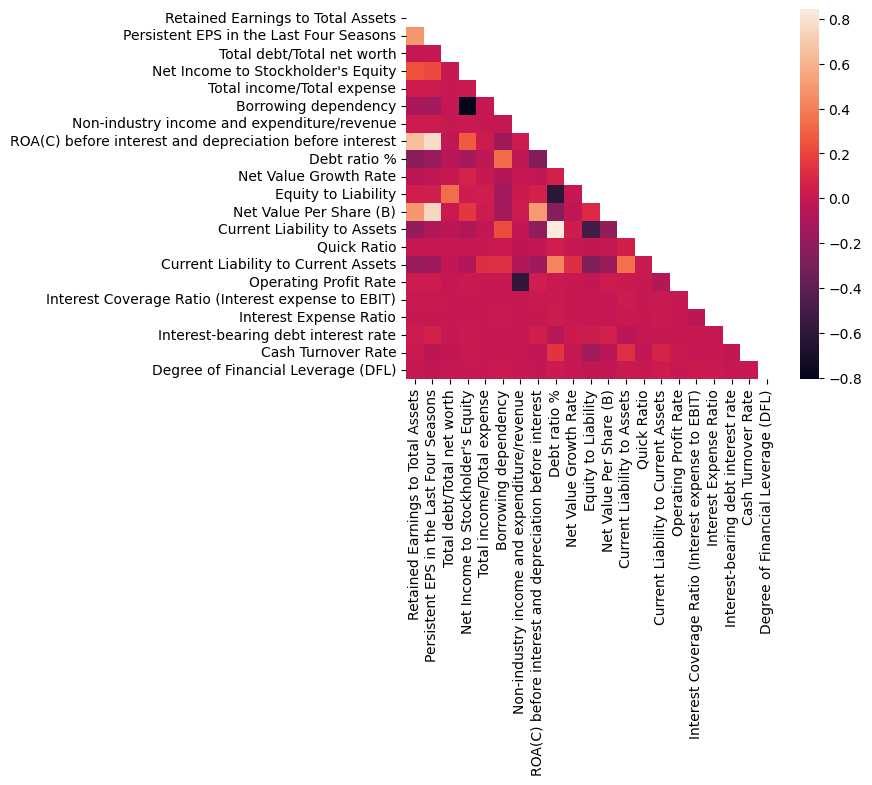

In [25]:
# Calculate correlation between each pair of variable
corr_matrix=new_df.corr()
 
# Can be great to plot only a half matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, square=True)

### Model BaggingClassifier

In [27]:
new_X = new_df
X_train, X_test, y_train, y_test = train_test_split(new_X, y, 
                                                    test_size=0.3, 
                                                    stratify=y)
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

1    4619
0    4619
Name: Bankrupt?, dtype: int64

Train data accuracy: 1.0
Test data accuracy: 0.9271749755620723


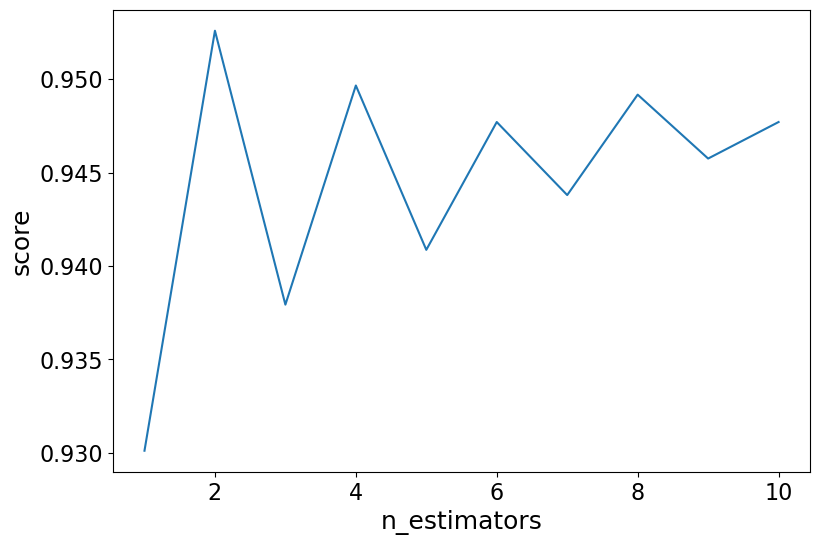

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

dtree = DecisionTreeClassifier(random_state = 42)
dtree.fit(X_train,y_train)
DecisionTreeClassifier(random_state=42)
y_pred = dtree.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))
estimator_range = [1,2,3,4,5,6,7,8,9,10]
models = []
scores = []
for n_estimators in estimator_range:
    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 42)
    # Fit the model
    clf.fit(X_train, y_train)
    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))
# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)
# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)
# Visualize plot
plt.show()
# Create bagging classifier


In [30]:
bagg_model = BaggingClassifier(n_estimators = 2, random_state = 42)
# Fit the model
bagg_model.fit(X_train, y_train)
# Doing the predictions
y_pred = bagg_model.predict(X_train)
y_pred_test = bagg_model.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred),
                                         precision_score(y_train, y_pred),
                                         recall_score(y_train, y_pred)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.982788,0.952590
1,Precision,0.996659,0.275362
2,Recall,0.968824,0.287879


### Model MultinomialNB

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

This is a classification technique that determines the probability of an outcome, given a set of conditions using the Bayes theorem.

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [32]:
new_X = new_df


In [33]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, 
                                                    test_size=0.3, 
                                                    stratify=y)

In [34]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

0    4619
1    4619
Name: Bankrupt?, dtype: int64

In [35]:
NB_model = MultinomialNB().fit(X_train, y_train)
y_pred_test = NB_model.predict(X_test)
y_pred_train = NB_model.predict(X_train)

print('Accuracy:', accuracy_score(y_test, y_pred_test))
print('F1 score:', f1_score(y_test, y_pred_test, average="macro"))
print(classification_report(y_test, y_pred_test)) # The closer to 1 the better the performance

Accuracy: 0.7653958944281525
F1 score: 0.4550599829095872
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1980
           1       0.03      0.17      0.04        66

    accuracy                           0.77      2046
   macro avg       0.50      0.48      0.46      2046
weighted avg       0.94      0.77      0.84      2046



In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.468175,0.765396
1,Precision,0.414336,0.025229
2,Recall,0.153929,0.166667


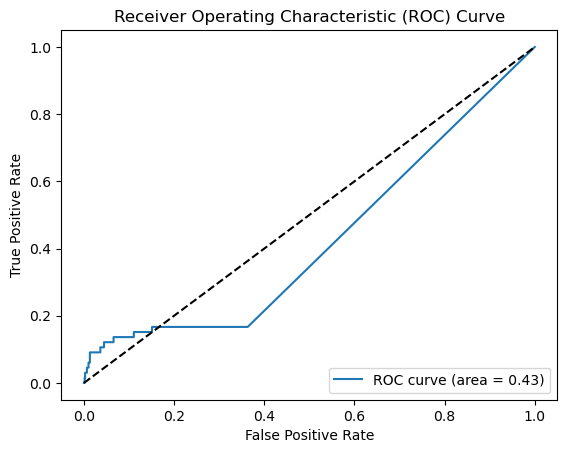

In [37]:
from sklearn.metrics import roc_curve, auc
# Predict probabilities for the test set
probs = NB_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Ridge Classifier

In [38]:
from sklearn.linear_model import RidgeClassifier

In [39]:
new_X = new_df
X_train, X_test, y_train, y_test = train_test_split(new_X, y, 
                                                    test_size=0.3, 
                                                    stratify=y)
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

0    4619
1    4619
Name: Bankrupt?, dtype: int64

In [40]:
rc_model = RidgeClassifier()
rc_model.fit(X_train, y_train)
score = rc_model.score(X_train, y_train)
print("Score: ", score)


Score:  0.8723749729378654


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.52519e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [41]:
y_pred_test = rc_model.predict(X_test)
y_pred_train = rc_model.predict(X_train)

print('Accuracy:', accuracy_score(y_test, y_pred_test))
print('F1 score:', f1_score(y_test, y_pred_test, average="macro"))
print(classification_report(y_test, y_pred_test)) # The closer to 1 the better the performance

Accuracy: 0.8470185728250245
F1 score: 0.5924735924735924
              precision    recall  f1-score   support

           0       1.00      0.85      0.91      1980
           1       0.16      0.88      0.27        66

    accuracy                           0.85      2046
   macro avg       0.58      0.86      0.59      2046
weighted avg       0.97      0.85      0.89      2046



In [42]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.872375,0.847019
1,Precision,0.858035,0.159780
2,Recall,0.892401,0.878788


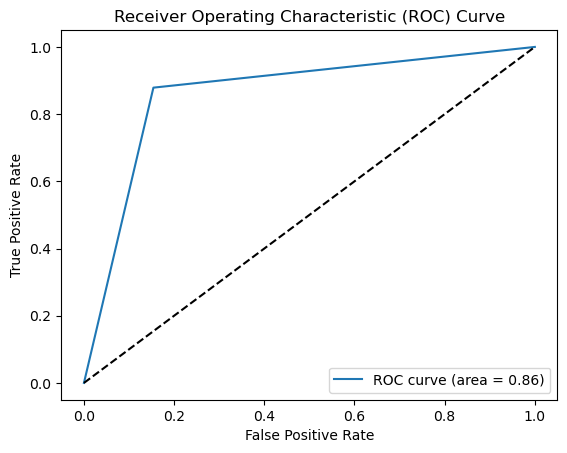

In [44]:
# Predict probabilities for the test set
#probs = rc_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test )

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

###  Stacking Model

In [45]:
from sklearn.ensemble  import StackingClassifier
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier

In [46]:
new_X = new_df
X_train, X_test, y_train, y_test = train_test_split(new_X, y, 
                                                    test_size=0.3, 
                                                    stratify=y)
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

0    4619
1    4619
Name: Bankrupt?, dtype: int64

In [47]:
# Fit the model
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),('knn', KNeighborsClassifier(n_neighbors=1))]
stack_model = StackingClassifier(estimators)
stack_model.fit(X_train, y_train)
y_pred_train = stack_model.predict(X_train)
y_pred_test = stack_model.predict(X_test)
performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall', 'ROC_AUC score'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train),
                                         roc_auc_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test),
                                        roc_auc_score(y_test, y_pred_test)]})
print(performance_df)

    Error_metric     Train      Test
0       Accuracy  0.999892  0.956500
1      Precision  1.000000  0.386139
2         Recall  0.999784  0.590909
3  ROC_AUC score  0.999892  0.779798


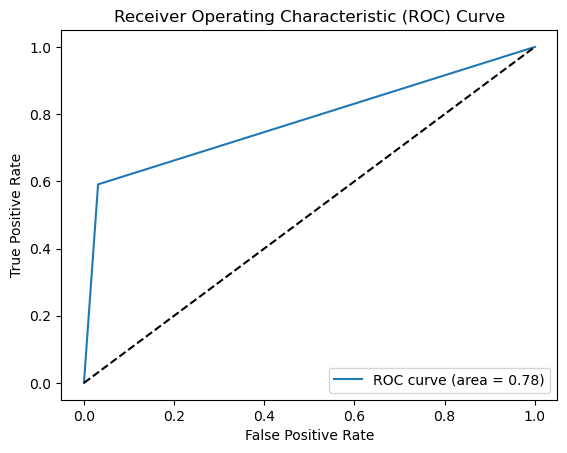

In [48]:
## Plot ROC_AUC curve
# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test )

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Model comparison

In [49]:
# Evaluate the models on the train and test sets
models = {'Bagging Classifier':bagg_model,'MultinomialNB': NB_model, 'Stacking Model':stack_model, 'RidgeClassifier': rc_model}
for name, model in models.items():
    print(name)
    print('Train set:')
    y_train_pred = model.predict(X_train)
    print('Accuracy: {:.3f}'.format(accuracy_score(y_train, y_train_pred)))
    print('Precision: {:.3f}'.format(precision_score(y_train, y_train_pred,  pos_label=1)))
    print('Recall: {:.3f}'.format(recall_score(y_train, y_train_pred,  pos_label=1)))
    print('Test set:')
    y_test_pred = model.predict(X_test)
    print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_test_pred)))
    print('Precision: {:.3f}'.format(precision_score(y_test, y_test_pred,  pos_label=1)))
    print('Recall: {:.3f}'.format(recall_score(y_test, y_test_pred,  pos_label=1)))
    print()

Bagging Classifier
Train set:
Accuracy: 0.870
Precision: 0.985
Recall: 0.752
Test set:
Accuracy: 0.987
Precision: 0.800
Recall: 0.788

MultinomialNB
Train set:
Accuracy: 0.472
Precision: 0.427
Recall: 0.163
Test set:
Accuracy: 0.767
Precision: 0.023
Recall: 0.152

Stacking Model
Train set:
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
Test set:
Accuracy: 0.957
Precision: 0.386
Recall: 0.591

RidgeClassifier
Train set:
Accuracy: 0.875
Precision: 0.859
Recall: 0.897
Test set:
Accuracy: 0.845
Precision: 0.156
Recall: 0.864



In [51]:
new_X = new_df
X_train, X_test, y_train, y_test = train_test_split(new_X, y, 
                                                    test_size=0.3, 
                                                    stratify=y)
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

0    4619
1    4619
Name: Bankrupt?, dtype: int64

In [52]:
from sklearn.metrics import roc_auc_score
# Evaluate the models on the train and test sets
from sklearn.metrics import roc_auc_score
models = {'BaggingClassifier': bagg_model, 'RidgeClassifier': rc_model, "MultinomialNB": NB_model, "Stacking": stack_model}
for name, mod in models.items():
    y_train_pred = mod.predict(X_train)
    y_test_pred = mod.predict(X_test)
    performance_log = pd.DataFrame({name: ['Accuracy','Precision','Recall','ROC AUC SCORE'],
                               'Train': [accuracy_score(y_train, y_train_pred),
                                         precision_score(y_train, y_train_pred),
                                         recall_score(y_train, y_train_pred),
                                         roc_auc_score(y_train, y_train_pred)],
                               'Test': [accuracy_score(y_test, y_test_pred),
                                        precision_score(y_test, y_test_pred),
                                        recall_score(y_test, y_test_pred),
                                        roc_auc_score(y_train, y_train_pred)]})
    display(performance_log)

,BaggingClassifier,Train,Test
0,Accuracy,0.895324,0.979961
1,Precision,0.988758,0.676056
2,Recall,0.799740,0.727273
3,ROC AUC SCORE,0.895324,0.895324


,RidgeClassifier,Train,Test
0,Accuracy,0.891102,0.846530
1,Precision,0.861807,0.141618
2,Recall,0.931587,0.742424
3,ROC AUC SCORE,0.891102,0.891102


,MultinomialNB,Train,Test
0,Accuracy,0.467201,0.768328
1,Precision,0.411867,0.025581
2,Recall,0.153280,0.166667
3,ROC AUC SCORE,0.467201,0.467201


,Stacking,Train,Test
0,Accuracy,0.958649,0.987781
1,Precision,0.989374,0.780822
2,Recall,0.927257,0.863636
3,ROC AUC SCORE,0.958649,0.958649
